# Mathematik für Biologiestudierende

Wintersemester 2025/26

13.01.2026

&copy; 2026 Prof. Dr. Rüdiger W. Braun 

# Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

# Themen heute

* Multiples Testen
* Posthoc-Analyse
* Ablesung genauerer Werte
* Behandlung von `NaN`
* die Idee hinter ANOVA
* Heteroskedastizität
* Levene-Test
* Alexander-Govern-Test

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats

# Multiples Testen

### Beispiel Gummibärchen

<img src="bilder/signi1.png" alt="Cartoon von xkcd" width="75%"/>


&copy; xkcd.com

<img src="bilder/signi2.png" alt="Cartoon von xkcd" width="75%"/>

<img src="bilder/signi3.png" alt="Cartoon von xkcd" width="75%"/>

<img src="bilder/signi4.png" alt="Cartoon von xkcd" width="75%"/>

* Ein Fall von Data Snooping
* Bei einem Signifikanztest zum Nivea $\alpha=0.05$ wird in 5% der Fälle die Nullhypothese fälschlich abgelehnt
* In dem Beispiel des Cartoons gibt es 20 Experimente; es ist zu erwarten, dass in einem Fall die Nullhypothese zu unrecht abgelehnt wird

* wenn wir gemäß Bonferroni korrigieren, dann müssen wir jeden einzelnen Test zum Signifikanzniveau $\frac\alpha{20}$ durchführen

* alternativ wiederholt man das Experiment mit grünen Gummibärchen

# ANOVA

* Mit einer ANOVA wird auf Unterschiede zwischen Gruppen getestet

# Post-hoc Analyse

* Wenn die ANOVA einen signifikanten Unterschied zwischen den Gruppen gezeigt hat, dann versucht man mit der post-hoc Analyse herauszubekommen, zwischen welchen einzelnen Gruppen signifikante Unterschiede bestehen
* Die post-hoc Analyse muss für multiple Vergleiche korrigiert werden

### Beispiel Zitronen

In [2]:
zitronen = pd.read_csv("http://reh.math.uni-duesseldorf.de/~braun/bio2425/zitronen.csv")

In [3]:
zitronen.head()

,Vitamin_C_Gehalt,Land
0,494.5,Spanien
1,499.2,Spanien
2,494.3,Spanien
3,478.0,Spanien
4,500.1,Spanien


Die Tabelle (mit erfundenen Daten) zeigt den Vitamin C Gehalt in [mg] pro [kg] von Zitronen aus verschiedenen Ländern

In [4]:
zitronen.Land.value_counts()

Land
Spanien         8
Italien         8
Griechenland    8
Marokko         8
Indien          8
Name: count, dtype: int64

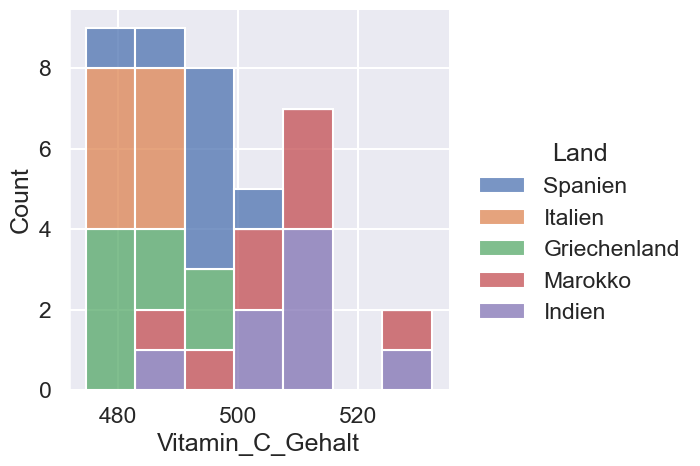

In [5]:
sns.displot(zitronen, x='Vitamin_C_Gehalt', hue='Land', multiple='stack');

In [6]:
spanien = zitronen[zitronen.Land=='Spanien'].Vitamin_C_Gehalt
italien = zitronen[zitronen.Land=='Italien'].Vitamin_C_Gehalt
griechenland = zitronen[zitronen.Land=='Griechenland'].Vitamin_C_Gehalt
marokko = zitronen[zitronen.Land=='Marokko'].Vitamin_C_Gehalt
indien = zitronen[zitronen.Land=='Indien'].Vitamin_C_Gehalt

In [7]:
stats.f_oneway(spanien, italien, griechenland, marokko, indien)

F_onewayResult(statistic=11.873757820342002, pvalue=3.3733416696757513e-06)

## Paarvergleiche

In [8]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [9]:
muc = MultiComparison(zitronen.Vitamin_C_Gehalt, zitronen.Land)

In [10]:
res = muc.allpairtest(stats.ttest_ind, method='bonferroni')
res[0]

group1,group2,stat,pval,pval_corr,reject
Griechenland,Indien,-4.9524,0.0002,0.0021,True
Griechenland,Italien,1.113,0.2845,1.0,False
Griechenland,Marokko,-3.5339,0.0033,0.0331,True
Griechenland,Spanien,-1.9478,0.0718,0.7178,False
Indien,Italien,6.2008,0.0,0.0002,True
Indien,Marokko,0.3183,0.7549,1.0,False
Indien,Spanien,3.3226,0.005,0.0503,False
Italien,Marokko,-4.3312,0.0007,0.0069,True
Italien,Spanien,-3.3042,0.0052,0.0522,False
Marokko,Spanien,2.2786,0.0389,0.389,False


Nur vier der Paarvergleiche sind signifikant, wenn Bonferroni korrigiert wird

Dasselbe mit Bonferroni-Holm

In [11]:
res = muc.allpairtest(stats.ttest_ind, method='holm')
res[0]

group1,group2,stat,pval,pval_corr,reject
Griechenland,Indien,-4.9524,0.0002,0.0019,True
Griechenland,Italien,1.113,0.2845,0.5689,False
Griechenland,Marokko,-3.5339,0.0033,0.0231,True
Griechenland,Spanien,-1.9478,0.0718,0.2153,False
Indien,Italien,6.2008,0.0,0.0002,True
Indien,Marokko,0.3183,0.7549,0.7549,False
Indien,Spanien,3.3226,0.005,0.0302,True
Italien,Marokko,-4.3312,0.0007,0.0055,True
Italien,Spanien,-3.3042,0.0052,0.0302,True
Marokko,Spanien,2.2786,0.0389,0.1556,False


* Wenn Bonferroni-Holm korrigiert wird, dann sind sechs der Paarvergleiche signifikant

## Ablesung genauerer Werte

* Woher bekommt man die genauen *p*-Werte?
* `res = muc.allpairtest(stats.ttest_ind)`, dann ist `res` eine Liste (genauer: ein Tupel) mit zwei Einträgen
* `res[0]` ist die leserfreundlich formatierte Tabelle
* die genauen Werte stehen in `res[1]`

In [12]:
res[1] 

(array([[-4.95235073e+00,  2.12516086e-04],
        [ 1.11298427e+00,  2.84460819e-01],
        [-3.53387275e+00,  3.30511610e-03],
        [-1.94781061e+00,  7.17760991e-02],
        [ 6.20082296e+00,  2.31091193e-05],
        [ 3.18345880e-01,  7.54921930e-01],
        [ 3.32261512e+00,  5.03074269e-03],
        [-4.33123161e+00,  6.90566981e-04],
        [-3.30423221e+00,  5.21815835e-03],
        [ 2.27858634e+00,  3.88961763e-02]]),
 array([ True, False,  True, False,  True, False,  True,  True,  True,
        False]),
 array([1.91264477e-03, 5.68921637e-01, 2.31358127e-02, 2.15328297e-01,
        2.31091193e-04, 7.54921930e-01, 3.01844561e-02, 5.52453585e-03,
        3.01844561e-02, 1.55584705e-01]),
 0.005116196891823743,
 0.005)

* Der erste Array ist zweidimensional und enthält die genauen Werte der Statistik und die unkorrigierten *p*-Werte

* für uns wichtig ist der dritte Array, der die korrigierten *p*-Werte in der Reihenfolge enthält in der die Paarvergleiche in der Tabelle aufgeführt sind

In [13]:
p_werte_korrigiert = res[1][2]
p_werte_korrigiert

array([1.91264477e-03, 5.68921637e-01, 2.31358127e-02, 2.15328297e-01,
       2.31091193e-04, 7.54921930e-01, 3.01844561e-02, 5.52453585e-03,
       3.01844561e-02, 1.55584705e-01])

In [14]:
stats.f_oneway(spanien, italien, griechenland, marokko, indien).pvalue

3.3733416696757513e-06

Der *p*-Wert der ANOVA ist kleiner als 5.0E-6.  Daher ist zu diesem Signifikanzniveau nachgewiesen, dass Zitronen aus verschiedenen Ländern unterschiedliche Vitamin C Gehalte haben.  Wir rechnen die post-hoc Analyse für dieses Signifikanzniveau

In [15]:
res = muc.allpairtest(stats.ttest_ind, alpha=5.0E-6, method='holm')

In [16]:
res[0]

group1,group2,stat,pval,pval_corr,reject
Griechenland,Indien,-4.9524,0.0002,0.0019,False
Griechenland,Italien,1.113,0.2845,0.5689,False
Griechenland,Marokko,-3.5339,0.0033,0.0231,False
Griechenland,Spanien,-1.9478,0.0718,0.2153,False
Indien,Italien,6.2008,0.0,0.0002,False
Indien,Marokko,0.3183,0.7549,0.7549,False
Indien,Spanien,3.3226,0.005,0.0302,False
Italien,Marokko,-4.3312,0.0007,0.0055,False
Italien,Spanien,-3.3042,0.0052,0.0302,False
Marokko,Spanien,2.2786,0.0389,0.1556,False


Keiner der Paarvergleiche ist signifikant.

# Behandlung von NaN

In [17]:
pingus = sns.load_dataset('penguins')
pingus.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Es gibt zwei Möglichkeiten, die `NaN` zu entfernen

* mit `pingus.dropna()` werden alle Zeilen entfernt, bei denen mindestens ein Eintrag fehlt

* mit dem folgenden Verfahren entfernen wir alle Zeilen, für die `body_mass_g` keinen Eintrag besitzt 

In [18]:
pingus_mit_gewichtsangabe = pingus[pingus.body_mass_g.notna()]

In [19]:
pingus_mit_gewichtsangabe.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


zum Vergleich

In [20]:
pingus.dropna().describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [21]:
pingus.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [22]:
gA = pingus[pingus.species=='Adelie'].body_mass_g.dropna()
gC = pingus[pingus.species=='Chinstrap'].body_mass_g.dropna()
gG = pingus[pingus.species=='Gentoo'].body_mass_g.dropna()

In [23]:
stats.f_oneway(gA, gC, gG)

F_onewayResult(statistic=343.62627520548085, pvalue=2.892368133377531e-82)

In [24]:
muc = MultiComparison(pingus_mit_gewichtsangabe.body_mass_g, pingus_mit_gewichtsangabe.island)

In [25]:
res = muc.allpairtest(stats.ttest_ind, method='bonferroni')

In [26]:
res[0]

group1,group2,stat,pval,pval_corr,reject
Biscoe,Dream,12.9663,0.0,0.0,True
Biscoe,Torgersen,8.7781,0.0,0.0,True
Dream,Torgersen,0.0924,0.9265,1.0,False


# Was hat ANOVA mit Varianzen bzw. Stichprobenstreuungen zu tun?

ANOVA:  "Analysis of Variance"

Wir gehen zurück zum Beispiel Schadstoffkonzentration

In [27]:
u_schad = "https://www.math.uni-duesseldorf.de/~braun/bio2324/data/schadstoffe.csv"
schadstoffe = pd.read_csv(u_schad, index_col=0)
schadstoffe.head()

,Messstelle,Konzentration
0,5,0.000867
1,3,0.000490
2,1,0.000589
3,1,0.000950
4,4,0.001152


In [28]:
g1 = schadstoffe[schadstoffe.Messstelle==1].Konzentration
g2 = schadstoffe[schadstoffe.Messstelle==2].Konzentration
g3 = schadstoffe[schadstoffe.Messstelle==3].Konzentration
g4 = schadstoffe[schadstoffe.Messstelle==4].Konzentration
g5 = schadstoffe[schadstoffe.Messstelle==5].Konzentration

In [29]:
schadstoffe.Konzentration.std()

0.00034083567416156316

In [30]:
g1.std()

0.0003088278193577403

In [31]:
g2.std()

0.0004360906113112883

In [32]:
g3.std()

0.00033459177573784817

In [33]:
g4.std()

0.00032047637643428304

In [34]:
g5.std()

0.0003095504974203532

Die Stichprobenstreuung des gesamten Datensatzes ist ungefähr dieselbe wie die jeder einzelnen Gruppe

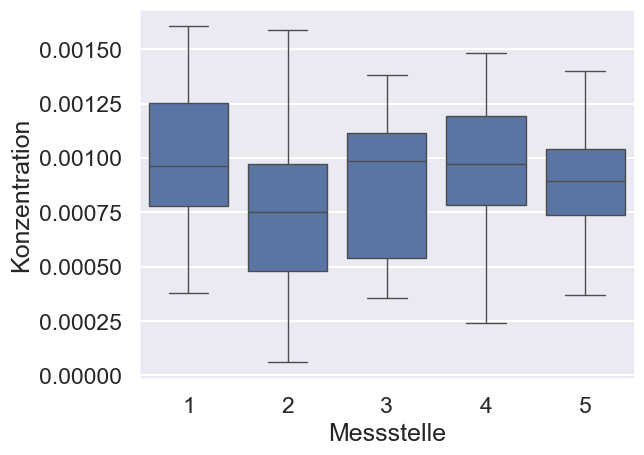

In [35]:
ax = sns.boxplot(schadstoffe, y="Konzentration", x="Messstelle");

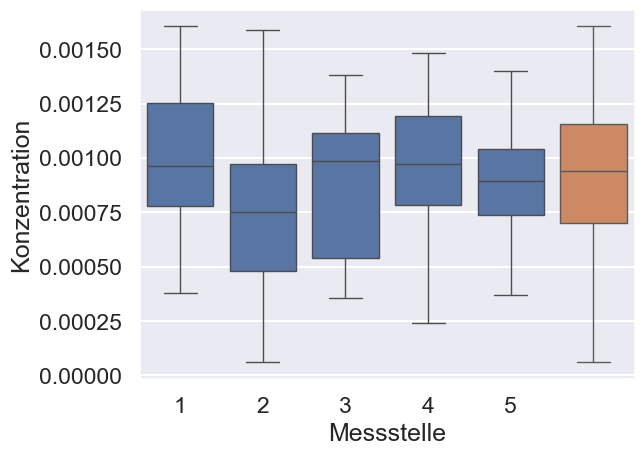

In [36]:
sns.boxplot(schadstoffe, y="Konzentration", ax=ax)
ax.figure

#### Jetzt dasselbe mit den Pinguinen

In [37]:
pingus_mit_gewichtsangabe.body_mass_g.std()

801.9545356980955

In [39]:
gA.std()

458.5661259101348

In [40]:
gC.std()

384.3350813871914

In [41]:
gG.std()

504.11623665709163

* Die Stichprobenstreuung im gesamten Datensatz ist größer als in den einzelnen Gruppen.  
* Der Unterschied kommt daher, dass sich die Gruppenmittelwerte stärker unterscheiden, als sich das durch Variation innerhalb der Gruppen erklären lässt

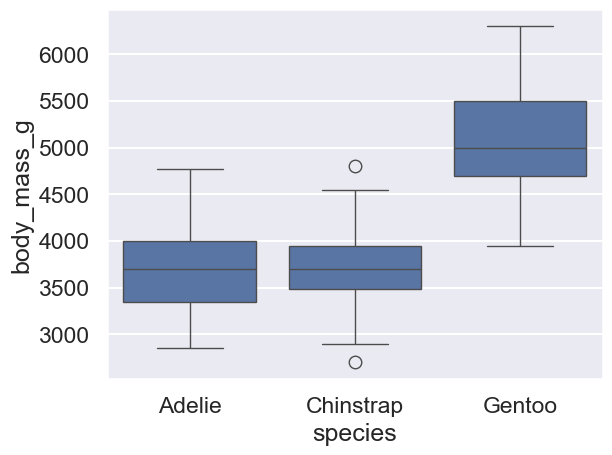

In [42]:
ax = sns.boxplot(pingus_mit_gewichtsangabe, y='body_mass_g', x='species');

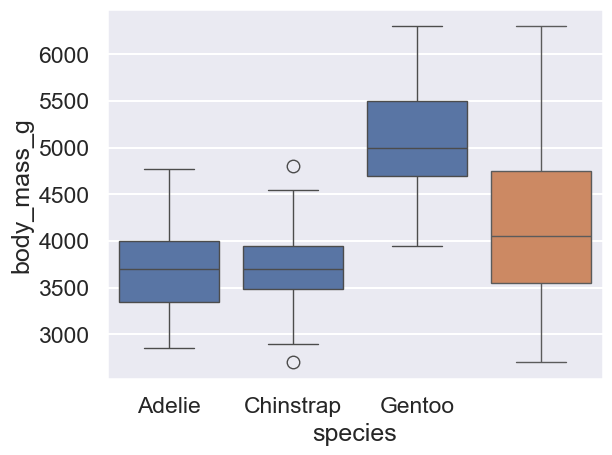

In [43]:
sns.boxplot(pingus_mit_gewichtsangabe, y="body_mass_g", ax=ax)
ax.figure

* der Boxplot zeigt den Interquartilabstand und nicht die Streuung
* unsere Daten sind aber normalverteilt, daher verhalten sind Streuung und Interquartilabstand ähnlich

* in der tatsächlich benutzen Formel kommt anstelle der Stichprobenstreuung die Varianz vor, daher der Name "Analysis of Varianz"

# Heteroskedastizität

* Die ANOVA vergleicht die Varianzen innerhalb der einzelnen Gruppen mit der Varianz im gesamten Datensatz, um die Unterschiede zwischen den Gruppen zu untersuchen
* À priori geht das erstmal nur, wenn die Varianzen innerhalb der Gruppen gleich sind

* Ein Datensatz ist *heteroskedastisch*, wenn die verschiedenen Gruppen unterschiedliche Varianz haben
* Sonst ist er *homoskedastisch*

# Der Levene-Test

Der Levene-Test testet auf Gleichheit der Varianzen

Drei verschiedene Lehrmethoden werden angewandt.  Die Ergebnisse der Probandinnen und Probanden im Abschlusstest werden verglichen.  Führen verschiedene Lehrmethoden zu unterschiedlichen Ergebnissen?

In [44]:
la = [42, 115, 73, 58, 64, 100, 112, 112, 52, 70,
    152, 215, 176, 97, 145, 100, 82, 94, 165, 97]

lb = [165, 165, 152, 173, 225, 173, 136, 145, 188, 155,
    197, 233, 236, 264, 200, 252, 258, 212, 145, 273]

lc = [236, 185, 339, 255, 264, 325, 267, 215, 233, 295,
    255, 264, 224, 245, 248, 309, 264, 273, 294, 230]

Test auf Heteroskedastizität

In [45]:
stats.levene(la, lb, lc)

LeveneResult(statistic=0.6457341109631508, pvalue=0.5280694573759905)

* Der p-Wert ist 0.53.  Die Daten sind homoskedastisch.

* Wir können also mit der ANOVA fortfahren

In [46]:
stats.f_oneway(la, lb, lc)

F_onewayResult(statistic=67.41573785674247, pvalue=9.532727011699946e-16)

### Beispiel: Barsche

Es werden Barsche gleichen Alters verglichen

In [47]:
barsche = pd.read_csv('barsche.csv')
barsche.head()

,Art,Länge
0,gestreift,9.890006
1,gestreift,9.343944
2,gestreift,9.867069
3,gestreift,10.302781
4,gestreift,10.066964


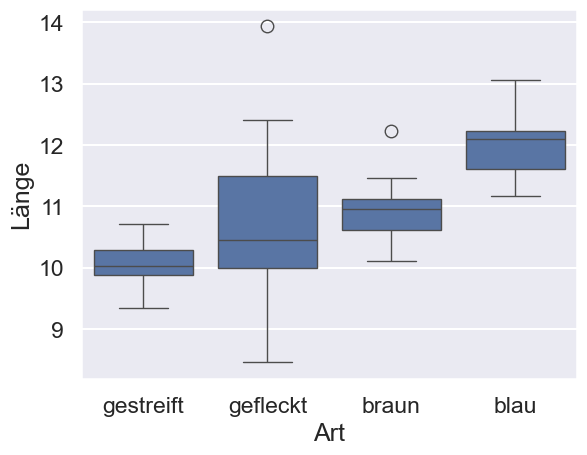

In [48]:
sns.boxplot(data=barsche, x="Art", y="Länge");

Sieht heteroskedastisch aus.  

In [49]:
ds = barsche[barsche.Art=='gestreift'].Länge
dl = barsche[barsche.Art=='gefleckt'].Länge
db = barsche[barsche.Art=='blau'].Länge
dr = barsche[barsche.Art=='braun'].Länge

In [50]:
stats.levene(ds, dl, dr, db)

LeveneResult(statistic=13.459492972830807, pvalue=1.3472893996510424e-07)

# Probleme beim Test auf Heteroskedastizität

* Die Nullhypothese beim Levene-Test ist 

> $H_0$:  Die Daten sind homoskedastisch

* Ein Hypothesentest "beweist" nie die Nullhypothese
  * bei starken Indizien dagegen lehnt er sie ab
  * bei starken Indizien dafür behält er sie bei
  * bei unklaren Indizien behält er sie auch bei 

* um zu erkennen, ob der Levene-Test Heteroskedastizität überhaupt erkennen kann, wäre eine Poweranalyse für den Levene-Test nötig, das ist aber unrealistisch

* auch das andere Extrem ist möglich:  Der Stichprobenumfang ist so groß, dass kleine Unterschiede schon signifikant werden

👁️eyeballing (scharfes Hinsehen)

# Alexander-Govern-Test

Wenn die Daten heteroskedastisch, aber normalverteilt sind, dann rechnet man einen Alexander-Govern-Test

In [51]:
stats.alexandergovern(ds, dl, dr, db)

AlexanderGovernResult(statistic=113.40810114676775, pvalue=2.02668339537414e-24)

Im homoskedastischen Fall ist der Alexander-Govern-Tests natürlich ebenfalls zulässig, sein *p*-Wert ist dann aber meist schlechter als der von `f_oneway`

In [53]:
stats.alexandergovern(la, lb, lc)

AlexanderGovernResult(statistic=56.82538049315829, pvalue=4.576415099851209e-13)

Zum Vergleich

In [54]:
stats.f_oneway(la, lb, lc)

F_onewayResult(statistic=67.41573785674247, pvalue=9.532727011699946e-16)